## <p style="text-align:center;">**Task 2 Huawei AI Training 2023**</p>


 Importing the libraries

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Importing data from csv file and taking a look at it.

In [73]:
data = pd.read_csv(r"C:\Users\deel\projects\Python_Projects\Task 2 Huawei Ai Training\Worldometer_Dataset.csv")
print(data.info())
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212 entries, 0 to 211
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country            212 non-null    object 
 1   Total Cases        212 non-null    object 
 2   New Cases          153 non-null    object 
 3   Total Deaths       161 non-null    object 
 4   New Deaths         87 non-null     object 
 5   Total Recovered    181 non-null    object 
 6   Active Cases       212 non-null    object 
 7   Serious, Critical  128 non-null    object 
 8   Tot�Cases/1M pop   210 non-null    object 
 9   Deaths/1M pop      159 non-null    float64
 10  Total Tests        154 non-null    object 
 11  Tests/1M pop       154 non-null    object 
dtypes: float64(1), object(11)
memory usage: 20.0+ KB
None


,Country,Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,Active Cases,"Serious, Critical",Tot�Cases/1M pop,Deaths/1M pop,Total Tests,Tests/1M pop
0,USA,"5,02,876","33,752","18,747","2,035","27,314","4,56,815","10,917","1,519",57.0,"25,38,888","7,670"
1,Spain,"1,58,273","5,051","16,081",634,"55,668","86,524","7,371","3,385",344.0,"3,55,000","7,593"
2,Italy,"1,47,577","3,951","18,849",570,"30,455","98,273","3,497","2,441",312.0,"9,06,864","14,999"
3,France,"1,24,869","7,120","13,197",987,"24,932","86,740","7,004","1,913",202.0,"3,33,807","5,114"
4,Germany,"1,22,171","3,936","2,736",129,"53,913","65,522","4,895","1,458",33.0,"13,17,887","15,730"


When we see **Italy Covid-19 data**, we can see that there isn't any missing value in it.

In [74]:
data[data['Country'] == 'Italy']

,Country,Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,Active Cases,"Serious, Critical",Tot�Cases/1M pop,Deaths/1M pop,Total Tests,Tests/1M pop
2,Italy,"1,47,577","3,951","18,849",570,"30,455","98,273","3,497","2,441",312.0,"9,06,864","14,999"


To not affect the plotting, we can remove all **``NaN``** values using the **```dropna()```** function,and then look at the result.

In [75]:
data.dropna(inplace=True)
data.info()

# 1. How many unique countries are there in the dataset?
data['Country'].value_counts()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74 entries, 0 to 148
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country            74 non-null     object 
 1   Total Cases        74 non-null     object 
 2   New Cases          74 non-null     object 
 3   Total Deaths       74 non-null     object 
 4   New Deaths         74 non-null     object 
 5   Total Recovered    74 non-null     object 
 6   Active Cases       74 non-null     object 
 7   Serious, Critical  74 non-null     object 
 8   Tot�Cases/1M pop   74 non-null     object 
 9   Deaths/1M pop      74 non-null     float64
 10  Total Tests        74 non-null     object 
 11  Tests/1M pop       74 non-null     object 
dtypes: float64(1), object(11)
memory usage: 7.5+ KB


USA            1
Lithuania      1
Hungary        1
New Zealand    1
Morocco        1
              ..
Poland         1
Australia      1
Norway         1
Chile          1
Zambia         1
Name: Country, Length: 74, dtype: int64

 <br><br><br>**Now we don't have any missing values in our dataset and we can plot our data to see the distribution of the total number of cases in the world in top 10 countries.**

<br> First let's fix our data so that we can manipulate it.


In [76]:
# I renamed the corrupted column name.
data.rename(columns={'Tot�Cases/1M pop': 'Total Cases/1M pop'}, inplace=True)

# I replaced the comma with an empty string and converted the data type to int.
for col in data.columns[1:]:
    if "/1M" in col and data[col].dtype == 'object':
        data[col] = data[col].str.replace(',', '').astype(float)
    elif data[col].dtype == 'object':
        data[col] = data[col].str.replace(',', '').astype(int)

# I sorted the data by the Total Cases column in descending order.
data.sort_values(by=['Total Cases'], ascending=False, inplace=True)

#Let's some statistics about the total cases.
data['Total Cases'].describe()

count        74.000000
mean      21230.540541
std       65520.853299
min          40.000000
25%        1039.250000
50%        3039.500000
75%        9286.000000
max      502876.000000
Name: Total Cases, dtype: float64

<br><br>Now let's plot it using matplotlib and see how it looks like.

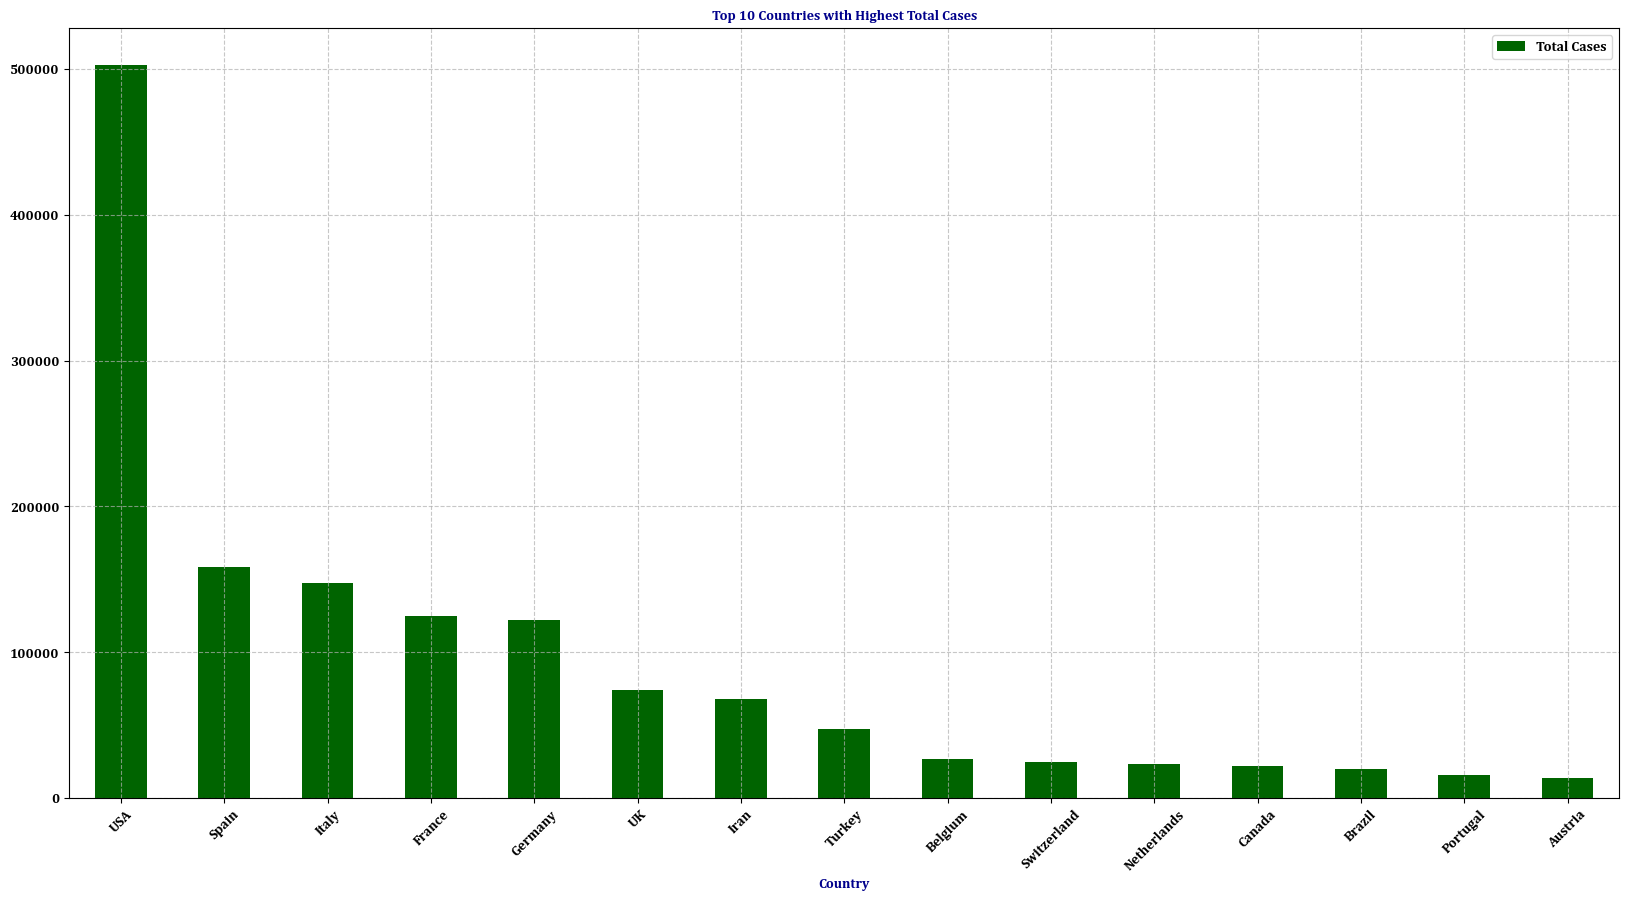

In [77]:
from matplotlib.font_manager import FontProperties
myfont = FontProperties(family='Cambria', size=10, weight='bold')  # Adjust font properties

# Create a new DataFrame with only the columns we want to plot.
to_plot = data[['Country', 'Total Cases']].head(15)

# Create a bar chart.
to_plot.plot(kind = 'bar', figsize = (20, 10), x = "Country", color = 'darkgreen')

# Set the title.
plt.title("Top 10 Countries with Highest Total Cases", color = 'darkblue', fontproperties = myfont)

# Set the grid.
plt.grid(True, linestyle='--', alpha=0.7)

# Set the y-axis tick labels.
plt.yticks(fontproperties= myfont)

# Set the x-axis tick labels. 
plt.xticks(fontproperties= myfont , rotation=45)

# Set the x-axis label.
plt.xlabel("Country", color = 'darkblue', fontproperties = myfont)

# Set the legend.
plt.legend(prop = myfont)

# Show the plot.
plt.show()

<br><br>Now let's find some statistics about **Italy**'s data.

In [81]:
# We can get the percentage between total cases and total recovered cases to see the recovery rate.

# We can get the percentage between total cases and total recovered cases to see the recovery rate.
df['Recovery Rate'] = df['Total Recovered']/df['Total Cases']*100

# We sort the data by recovery rate in descending order.
df_sorted = df.sort_values(by='Recovery Rate',ascending=False).reset_index()[['Country','Total Cases','Total Recovered','Recovery Rate']]

# We get the recovery rate for Italy.
df_sorted[df_sorted['Country'] == 'Italy']

,Country,Total Cases,Total Recovered,Recovery Rate
20,Italy,147577,30455,20.636685


So we can see that **Italy** is placed in the **20th** place for highest recovery rate.

<br><br><br> Now let's plot the recovery percentage for first 24 countries.

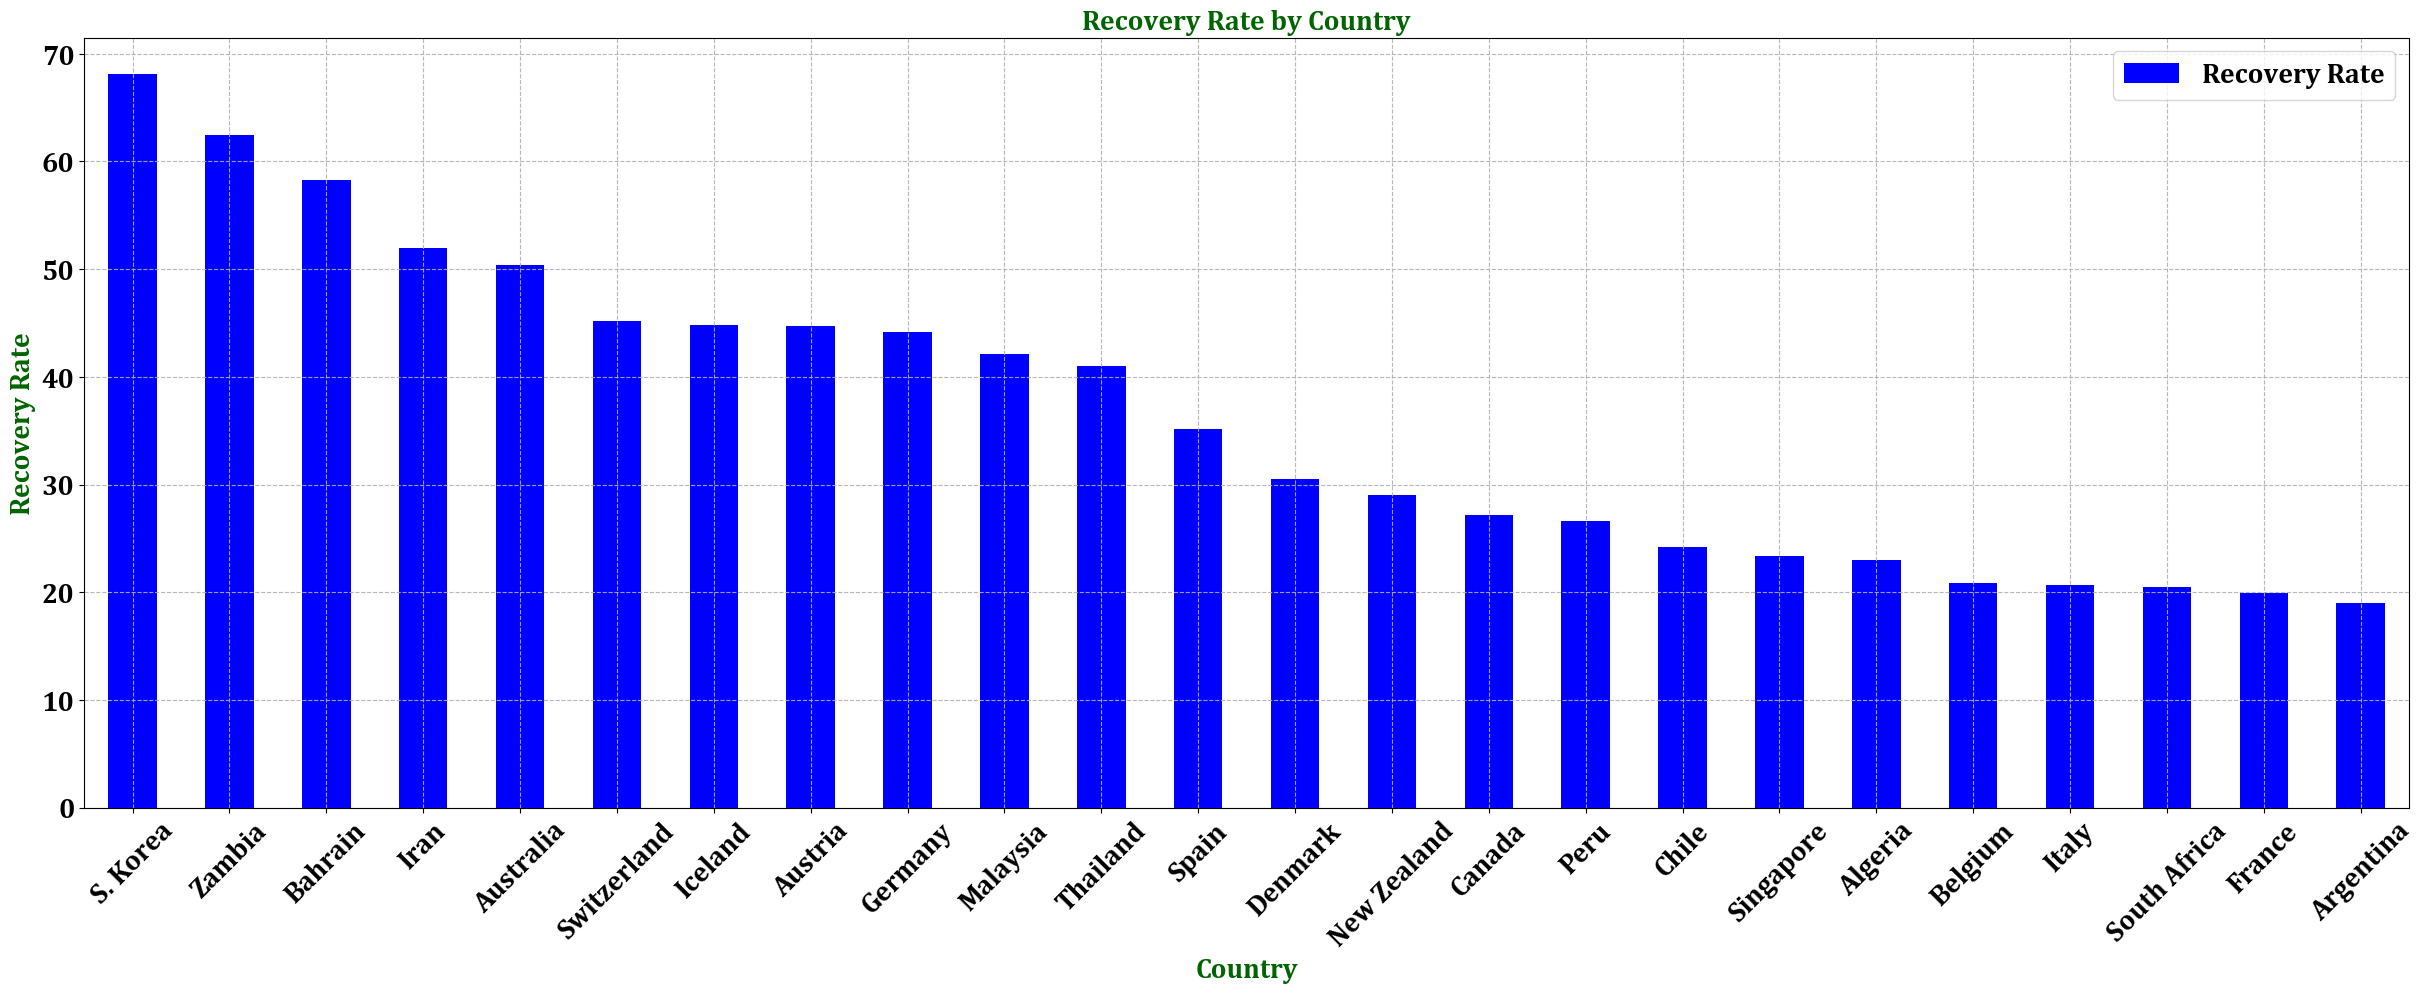

In [79]:
# Get the first 24 countries in the sorted DataFrame
top_24 = df.sort_values(by='Recovery Rate', ascending=False).reset_index().iloc[:24]
# Generate the bar plot
top_24.plot(kind = 'bar', x = 'Country', y='Recovery Rate', figsize=(30, 10), color='blue')
plt.grid(True, linestyle='--', alpha=0.9)

# Set the font properties
font = FontProperties(family='Cambria', size=20, weight='bold')

# Set the title and legend
plt.title('Recovery Rate by Country', fontproperties=font, color='darkgreen')
plt.legend(prop=font)

# Set the axis labels
plt.xlabel('Country', fontproperties=font, color='darkgreen')
plt.ylabel('Recovery Rate', fontproperties=font, color='darkgreen')

# Set the tick font properties
plt.xticks(fontproperties=font, rotation=45)
plt.yticks(fontproperties=font)

# Display the plot
plt.show()

### <p style="text-align:center;">**And now let's make it fun.**</p>

In [80]:
non_exist = data[data['Country'] == 'Israel'].loc[:, ['Country', 'Total Cases', 'Total Deaths', 'New Deaths', 'Total Recovered', 'Active Cases', 'Serious, Critical']]
non_exist.loc[:, 'Total Cases'] = 9191675 #2023 population of Non_exist country.
non_exist.loc[:, 'Total Deaths'] = non_exist.loc[:, 'Total Cases']
non_exist.loc[:, 'New Deaths'] = non_exist.loc[:, 'Total Cases']
non_exist.loc[:, 'Total Recovered'] = 0
non_exist.loc[:, 'Active Cases'] = 0
non_exist.loc[:, 'Serious, Critical'] = 0
non_exist.loc[:, 'Status'] = "All DEAD"
non_exist.loc[:, 'Date'] = pd.to_datetime('today')
non_exist.drop(columns=['Country'], inplace=True)


non_exist

,Total Cases,Total Deaths,New Deaths,Total Recovered,Active Cases,"Serious, Critical",Status,Date
18,9191675,9191675,9191675,0,0,0,All DEAD,2023-08-17 16:04:08.531376
